# Section 1

### Training assistant expert system

This expert system will take some parameters from the user (height, weight, if he/she trains strength and cardio, etc) and will recommend some tips based in the input.

*NOTICE* the input and output might miss information, this is just a simple example to show how CLIPSPY library works for expert systems.


1. Import library's dependencies and create template and rules

In [11]:
from clips import Environment, Symbol

TEMPLATE_STRING = '''
   (deftemplate training
      (slot weekly_freq (type INTEGER))
      (slot intensity (type INTEGER))
      (slot strength_training (type INTEGER))
      (slot cardio_training (type INTEGER))
      (slot objective (type SYMBOL))
      (slot calories (type FLOAT))
   )
'''

RULE_LOSE_WEIGHT = '''
   (defrule lose-weight
      "Start incorporating a caloric deficit to the diet."
      (training (objective lose))
      =>
      (printout t "- Start eating healty, incorporating a caloric deficit (e.g. -300kcals) alongside a consistent training routine." crlf)
   )
'''

RULE_MAINTAIN_WEIGHT = '''
   (defrule maintain-weight
      "Maintain current weight with a balanced diet."
      (training (objective maintain) (calories ?c))
      =>
      (printout t "- Maintain your current weight by eating approximately: " ?c "kcal per day with healty diet and training." crlf)
   )
'''

RULE_GAIN_WEIGHT = '''
   (defrule lose-weight
      "Start incorporating a caloric habit to the diet."
      (training (objective gain))
      =>
      (printout t "- Start a bulk (caloric habit (e.g. +300kcals)) alongside strength training and less cardio." crlf)
   )
'''

RULE_START_TRAINING = '''
   (defrule recommend-training
      "Recommend start training."
      (training (weekly_freq 0))
      =>
      (printout t "- Start training at least 3 times a week, combining cardio, light weighted strength training and eat healthy." crlf)
   )
'''

RULE_MORE_STRENGTH = '''
   (defrule recommend-more-strength
      "Recommend adding strength training to the routine."
      (training (strength_training 0) (weekly_freq ?f &: (< ?f 3) &: (> ?f 0)))
      =>
      (printout t "- You should incorporate strength training into your routine to build muscle." crlf)
   )
'''

RULE_MORE_CARDIO = '''
   (defrule recommend-more-cardio
      "Recommend adding cardio training to the routine."
      (training (cardio_training 0) (weekly_freq ?f &: (< ?f 3) &: (> ?f 0)))
      =>
      (printout t "- You should incorporate cardio training into your routine to improve cardio vascular health and breathing technique." crlf)
   )
'''

env = Environment()
# These rules are very basic and might be incomplete for a real case
env.build(TEMPLATE_STRING)
env.build(RULE_START_TRAINING)
env.build(RULE_MORE_STRENGTH)
env.build(RULE_MORE_CARDIO)
env.build(RULE_LOSE_WEIGHT)
env.build(RULE_MAINTAIN_WEIGHT)
env.build(RULE_GAIN_WEIGHT)

template = env.find_template('training')

2. Additional functions to make calculus and check input data

In [12]:
def calculate_bmr(weight, height, age, gender):
   base = 10 * weight + 6.25 * height - 5 * age
   return base + 5 if gender == 'male' else base - 161

def validate_training_data(gender, weekly_freq, intensity, strength_training, cardio_training, objective):
   valid_objectives = ['lose', 'maintain', 'gain']
   valid_genders = ['male', 'female']
   if gender not in valid_genders:
      raise ValueError(f'Gender must be one of {valid_genders}, got {gender}.')
   if not (0 <= weekly_freq <= 7):
      raise ValueError(f'Weekly frequency value must be between 0 and 7, got {weekly_freq}.')
   if not (0 <= intensity <= 10):
      raise ValueError(f'Intensity value must be between 0 and 10, got {intensity}.')
   if strength_training not in [0, 1]:
      raise ValueError(f'Strenght training value must be 0 or 1, got {strength_training}.')
   if cardio_training not in [0, 1]:
      raise ValueError(f'Cardio training value must be 0 or 1, got {cardio_training}.')
   if objective not in valid_objectives:
      raise ValueError(f'Objective value must be one of {valid_objectives}, got {objective}.')

3. Execute the required instructions to get user's input

In [9]:
print('- Welcome to your personal training assistant! -')
print('Please fill the following information (look carefully the suitable answers)')

print('Please fill in your details:')
try:
	weight = float(input('Enter your weight (kg): '))
	height = float(input('Enter your height (cm): '))
	age = int(input('Enter your age (years): '))
	gender = input('Enter your gender (male/female): ').strip().lower()
	weekly_freq = int(input('Enter weekly training frequency (0-7): '))
	intensity = int(input('Enter intensity level (1-10): '))
	strength_training = int(input('Strength training? (1 for Yes, 0 for No): '))
	cardio_training = int(input('Cardio training? (1 for Yes, 0 for No): '))
	objective = input('Enter your goal (lose/manitain/gain): ').strip().lower()
	validate_training_data(gender, weekly_freq, intensity, strength_training, cardio_training, objective)

	calories = calculate_bmr(weight = weight, height = height, age = age, gender = gender)

	print(f'- Your calorie intake: ~{calories}')

	fact = template.assert_fact(
		weekly_freq=weekly_freq,
		intensity=intensity,
		strength_training=strength_training,
		cardio_training=cardio_training,
		objective=Symbol(objective),
		calories=calories
	)
	print(f"Asserted fact: {fact}")
	print('\nHere you have your recommendations:')
	env.run()
except ValueError as v_error:
	print(f'Invalid input: {v_error}')

- Welcome to your personal training assistant! -
Please fill the following information (look carefully the suitable answers)
Please fill in your details:
- Your calorie intake: ~1825.0
Asserted fact: (training (weekly_freq 4) (intensity 7) (strength_training 1) (cardio_training 0) (objective maintain) (calories 1825.0))

Here you have your recommendations:
- Maintain your current weight by eating approximately: 1825.0kcal per day with healty diet and training.


In [13]:
# Alternaively, you can use this no to use the input method (but then the input check will not be performed)
fact = template.assert_fact(
   weekly_freq=4,
   intensity=7,
   strength_training=1,
   cardio_training=0,
   objective=Symbol('gain'),
   calories=calculate_bmr(weight=82, height=180, age=25, gender='male'),
)

env.run()

- Start a bulk (caloric habit (e.g. +300kcals)) alongside strength training and less cardio.


1

### Alternative for this notebook

For this first section, you can also execute the `main.py` file in the [repository](https://github.com/CharlyMech/IEDIB_CEIA_2024-25/tree/main/Modelos%20de%20Inteligencia%20Artificial/Bloque%203/Actividades/3.1) following the instructions enumerated in the `README.md` file. You'll see that is a little bit different but it works the same way as this notebook. This notebook's code has been modified from that repository for explanation purposes.

# Section 2

Create a new agent to solve one of the [arcprize.org](https://arcprize.org/) problems following these instructions: 
* Define the input and output grids.
* Construct the auxiliary functions you need to solve the problem. In the puzzle problem, these functions found the horizontal, vertical and square pieces.
* Construct a solution function using the auxiliary functions from the previous ones.
* Check that the solution to the training inputs are the corresponding outputs.
* Check that the solution to the test input corresponds to the solution on the web.

For this exercise I decided to create an agent to solve the last one of the puzzles at the web.

In [2]:
import numpy as np

def split_matrix(matrix, separator=-1):
	separator_index = np.where(matrix[0] == separator)[0][0]

	left = matrix[:, :separator_index]
	right = matrix[:, separator_index + 1:]

	return left, right

def get_union(left, right):
	return np.logical_and(left, right)


In [3]:
first_example = np.array([
	[1, 0, 0, -1, 0, 1, 0],
	[0, 1, 0, -1, 1, 1, 1],
	[1, 0, 0, -1, 0, 0, 0]
])
first_left, first_right = split_matrix(first_example)
first_solution = get_union(first_left, first_right)

second_example = np.array([
	[1, 1, 0, -1, 0, 1, 0],
	[0, 0, 1, -1, 1, 1, 1],
	[1, 1, 0, -1, 0, 1, 0]
])
second_left, second_right = split_matrix(second_example)
second_solution = get_union(second_left, second_right)

third_example = np.array([
	[0, 0, 1, -1, 0, 0, 0],
	[1, 1, 0, -1, 1, 0, 1],
	[0, 1, 1, -1, 1, 0, 1]
])
third_left, third_right = split_matrix(third_example)
third_solution = get_union(third_left, third_right)

test = np.array([
	[1, 0, 1, -1, 1, 0, 1],
	[0, 1, 0, -1, 1, 0, 1],
	[1, 0, 1, -1, 0, 1, 0]
])
test_left, test_right = split_matrix(test)
test_solution = get_union(test_left, test_right)

In [4]:
print('First example solution: ')
print(first_solution)

print('Second example solution: ')
print(second_solution)

print('Third example solution: ')
print(third_solution)

print('Test example solution: ')
print(test_solution)

First example solution: 
[[False False False]
 [False  True False]
 [False False False]]
Second example solution: 
[[False  True False]
 [False False  True]
 [False  True False]]
Third example solution: 
[[False False False]
 [ True False False]
 [False False  True]]
Test example solution: 
[[ True False  True]
 [False False False]
 [False False False]]


Now plot the results using `matplotlib` and a modified method from the previous exercise in block 2.

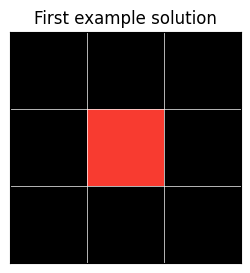

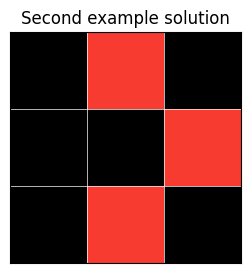

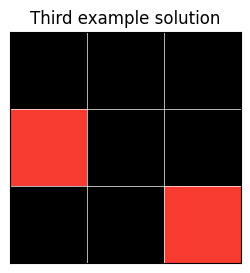

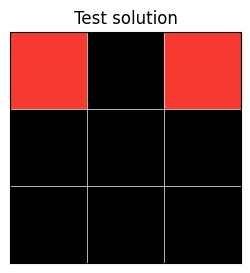

In [8]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def plot_solution(grid, title):
	rows, cols = grid.shape
	plt.figure(figsize=(cols, rows)) 
	cmap = mcolors.ListedColormap(['#000000', '#F83B30'])
	bounds = [0, 0.5, 1]
	norm = mcolors.BoundaryNorm(bounds, cmap.N)

	plt.imshow(grid, cmap=cmap, norm=norm, origin='upper')
	# Add grid lines
	for r in range(rows + 1):
		plt.axhline(r - 0.5, color='white', linewidth=0.5)
	for c in range(cols + 1):
		plt.axvline(c - 0.5, color='white', linewidth=0.5)

	# Remove ticks from axis
	plt.xticks(np.arange(cols), [])
	plt.yticks(np.arange(rows), [])
	plt.tick_params(which='both', bottom=False, left=False)
	plt.title(title)
	plt.show()

plot_solution(first_solution, 'First example solution')
plot_solution(second_solution, 'Second example solution')
plot_solution(third_solution, 'Third example solution')
plot_solution(test_solution, 'Test solution')